# Make figures

To run this notebook, the GWP notebook must first be run (for the base case, and adjust drydep to 80 and 50 Tg/yr)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))

plt.rcParams.update({'font.size': 15})
colorlist = ['C1','C2','C3','C4','C5','C6']

In [2]:
filepath= r"./output/"
df_drydep80_table_per_flux = pd.read_csv(filepath+'drydep_80_table_per_flux_h2.csv',index_col=0)
df_drydep50_table_per_flux = pd.read_csv(filepath+'drydep_50_table_per_flux_h2.csv',index_col=0)
df_table_per_flux = pd.read_csv(filepath+'table_per_flux_h2.csv',index_col=0)
df_table_per_flux

,deltaH2,surf_h2_per_h2_flux,surf_ch4_per_h2_flux,ch4_flux_per_h2_flux,ch4_rf_per_h2_flux,trop_du_ozone_per_h2_flux,strat_du_ozone_per_h2_flux,strat_du_6060_ozone_per_h2_flux,strat_du_gt60_ozone_per_h2_flux,ozone_rf_per_h2_flux,h2o_rf_per_h2_flux
OSLOCTM3,8.54,6.23,1.08,0.31,0.48,0.00,-0.00,0.00,0.00,0.22,0.17
WACCM6-2deg,9.93,5.36,1.14,0.33,0.50,0.00,0.00,0.00,0.00,0.17,0.02
INCA,7.19,7.39,1.17,0.29,0.52,0.00,-0.00,-0.00,-0.00,0.16,0.06
GFDL-emi,196,6.86,1.00,0.23,0.44,0.00,-0.00,-0.00,-0.00,0.17,0.14
OSLOCTM3-emi,12.4,6.47,1.11,0.32,0.49,nan,nan,nan,nan,0.22,nan


## Surface H2 concentration by 1 Tg H2/yr

In [3]:
tittel = 'Surface conc H2 by 1 Tg H2/yr'
ytittel ='[ppb H2/(Tg H2 yr-1)]'
field = 'surf_h2_per_h2_flux'
legend = True #False


In [4]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]
plot_values

OSLOCTM3       6.23
WACCM6-2deg    5.36
INCA           7.39
GFDL-emi       6.86
OSLOCTM3-emi   6.47
Name: surf_h2_per_h2_flux, dtype: float64

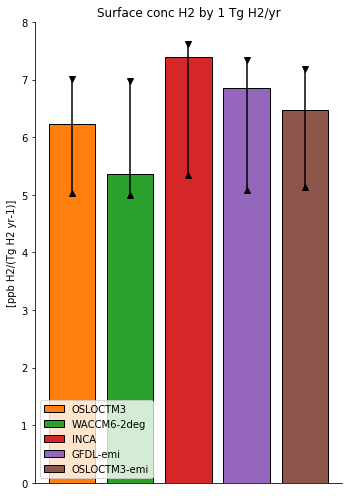

In [5]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):

    plt.bar(m,plot_values.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()


## Methane flux by 1 Tg H2/yr

In [6]:
tittel = 'Methane flux by 1 Tg H2'
ytittel ='[Tg CH4/Tg H2]'
field = 'ch4_flux_per_h2_flux'
legend = True #False

In [7]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

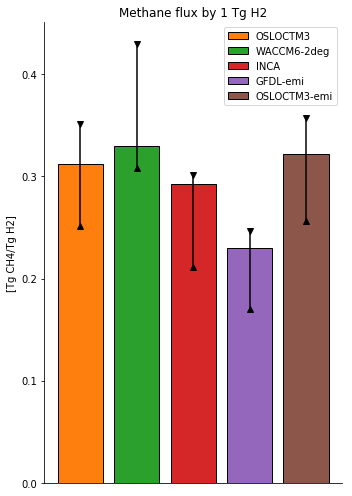

In [8]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()


## Methane RF per flux

In [9]:
tittel = 'Methane RF by 1 Tg H2'
ytittel ='[mW m-2/(Tg H2 yr$^{-1}$)]'
field = 'ch4_rf_per_h2_flux'
legend = True


In [10]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

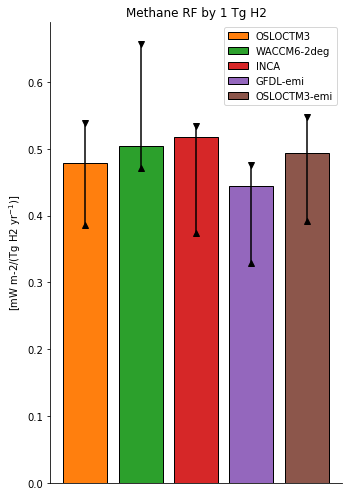

In [11]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):

    plt.bar(m,plot_values.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()


## Tropospheric ozone by H2 flux

In [12]:
tittel = 'Tropospheric ozone by H2 flux'
ytittel ='[DU yr/Tg H2]'
field = 'trop_du_ozone_per_h2_flux'
legend = True

For the following figures, add the methane induced effect

In [13]:
#Indirect effect via Methane.
df_drydep80_table_per_flux_ch4 = pd.read_csv(filepath+'drydep_80_table_per_flux_ch4.csv',index_col=0)
df_drydep50_table_per_flux_ch4 = pd.read_csv(filepath+'drydep_50_table_per_flux_ch4.csv',index_col=0)
df_table_per_flux_ch4 = pd.read_csv(filepath+'table_per_flux_ch4.csv',index_col=0)


In [14]:
field_ch4 = field.replace('h2_','ch4_')
print(field)
print(field_ch4)

trop_du_ozone_per_h2_flux
trop_du_ozone_per_ch4_flux


In [15]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]
plot_values
#print(plot_values_max_dry)
#print(plot_values_min_dry)

OSLOCTM3       0.00
WACCM6-2deg    0.00
INCA           0.00
GFDL-emi       0.00
OSLOCTM3-emi    nan
Name: trop_du_ozone_per_h2_flux, dtype: float64

In [16]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']


In [17]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_trop.txt'
df_ozone_du_trop = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#This should be tropospheric ozone [DU] in H2+CH4 minus H2. 
plot_values_ch4['GFDL-emi'] = df_ozone_du_trop['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_du_trop['GFDL-emi'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_du_trop['GFDL-emi'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL-emi']




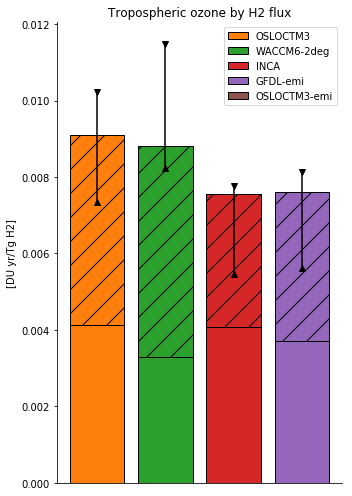

In [18]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()

## Stratospheric ozone by H2 flux

In [19]:
tittel = 'Stratospheric ozone by H2 flux'
ytittel ='[DU yr/Tg H2]'
field = 'strat_du_ozone_per_h2_flux'
legend = True #False

In [20]:
field_ch4 = field.replace('h2_','ch4_')

In [21]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [22]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']


In [23]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_strat.txt'
df_ozone_du_strat = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#This should be stratospheric ozone [DU] in H2+CH4 minus H2. 
plot_values_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL-emi']



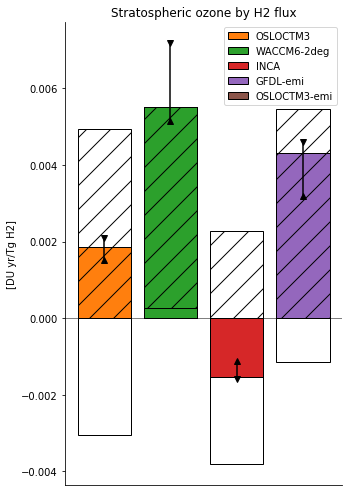

In [24]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()

## Stratospheric ozone 60S to 60N by H2 flux

In [25]:
tittel = 'Stratospheric ozone by H2 flux 60S to 60N'
ytittel ='[DU yr/Tg H2]'
field = 'strat_du_6060_ozone_per_h2_flux'
legend = True #False

In [26]:
field_ch4 = field.replace('h2_','ch4_')

In [27]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [28]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']


In [29]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_strat_6060.txt'
df_ozone_du_strat_6060 = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#This should be stratospheric ozone [DU] in H2+CH4 minus H2. 
plot_values_ch4['GFDL-emi'] = df_ozone_du_strat_6060['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_du_strat_6060['GFDL-emi'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_du_strat_6060['GFDL-emi'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL-emi']


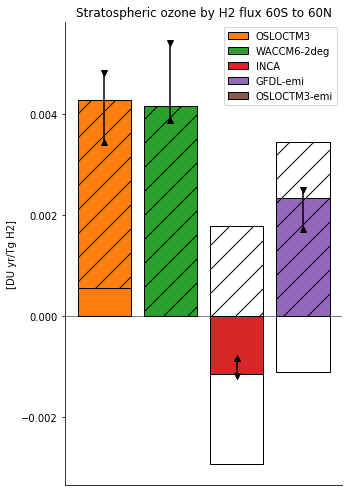

In [30]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()

### Stratospheric ozone <60S and >60N by H2 flux

In [31]:
tittel = 'Stratospheric ozone by H2 flux <60S and >60N'
ytittel ='[DU yr/Tg H2]'
field = 'strat_du_gt60_ozone_per_h2_flux'
legend = True #False

In [32]:
field_ch4 = field.replace('h2_','ch4_')

In [33]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [34]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']


In [35]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_strat_gt60.txt'
df_ozone_du_strat_gt60 = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#This should be stratospheric ozone [DU] in H2+CH4 minus H2. 
plot_values_ch4['GFDL-emi'] = df_ozone_du_strat_gt60['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_du_strat_gt60['GFDL-emi'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_du_strat_gt60['GFDL-emi'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL-emi']


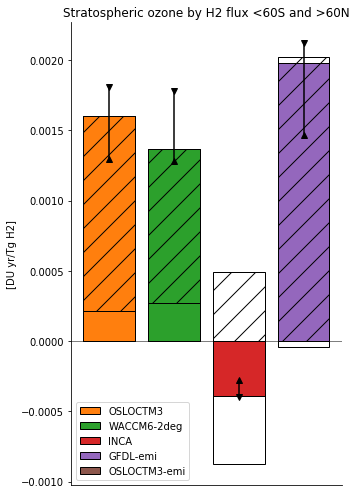

In [36]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()

## Ozone RF by 1 Tg H2

In [37]:
tittel = 'Ozone RF by 1 Tg H2'
ytittel ='[mW m-1 yr/Tg H2]'
field = 'ozone_rf_per_h2_flux'
legend = True #False

In [38]:
field_ch4 = field.replace('h2_','ch4_')

In [39]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [40]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']

In [41]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_rf.txt'
df_ozone_rf = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#This should be ozone RF in H2+CH4 minus H2. 
plot_values_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL-emi']



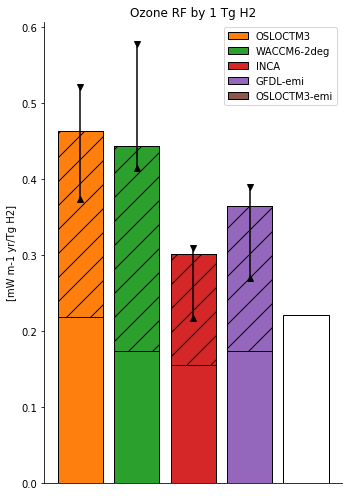

In [42]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):  
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()

## Strat. H2O RF by 1 Tg H2

In [43]:
tittel = 'Strat. H2O RF by 1 Tg H2'
ytittel ='[mW m-1 yr/Tg H2]'
field = 'h2o_rf_per_h2_flux'
legend = True

In [44]:
field_ch4 = field.replace('h2_','ch4_')

In [45]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [46]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']

In [47]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'H2O_rf_gfdl.txt'
df_h2o_rf = pd.read_csv(inputpath+file, sep=',',index_col=0,header=0)

gfdl_emi_ch4 = df_h2o_rf.loc['H2+CH4 [mW m-2]'] - df_h2o_rf.loc['H2 [mW m-2]']

#gfdl_emi_ch4
plot_values_ch4['GFDL-emi'] = gfdl_emi_ch4/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = gfdl_emi_ch4/df_drydep80_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = gfdl_emi_ch4/df_drydep50_table_per_flux['deltaH2'].loc['GFDL-emi']


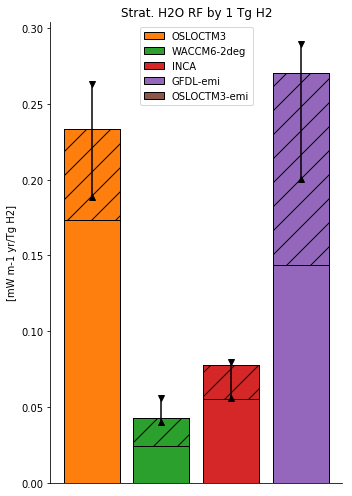

In [48]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()